# Coin Detection

**Name:** Muthulakshmi D   


In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

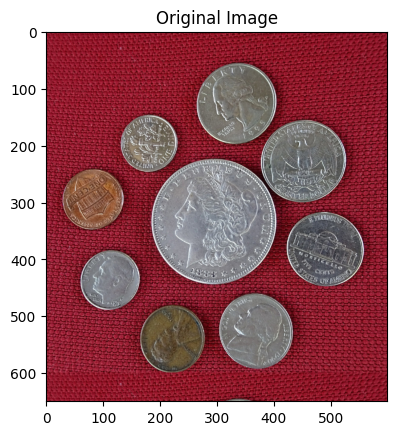

In [27]:
img = cv2.imread("coin.png") 
plt.imshow(img[:,:,::-1]);
plt.title("Original Image")
plt.show()

image to GrayScale 

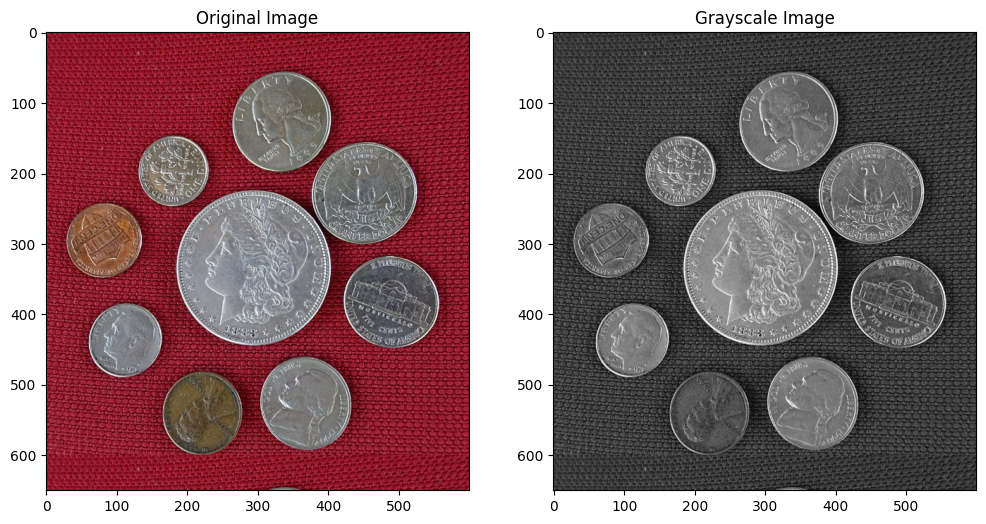

In [28]:
gray = cv2.imread("coin.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(gray,cmap='gray');plt.title("Grayscale Image"); plt.show()

## split image intpo r,g,b channels

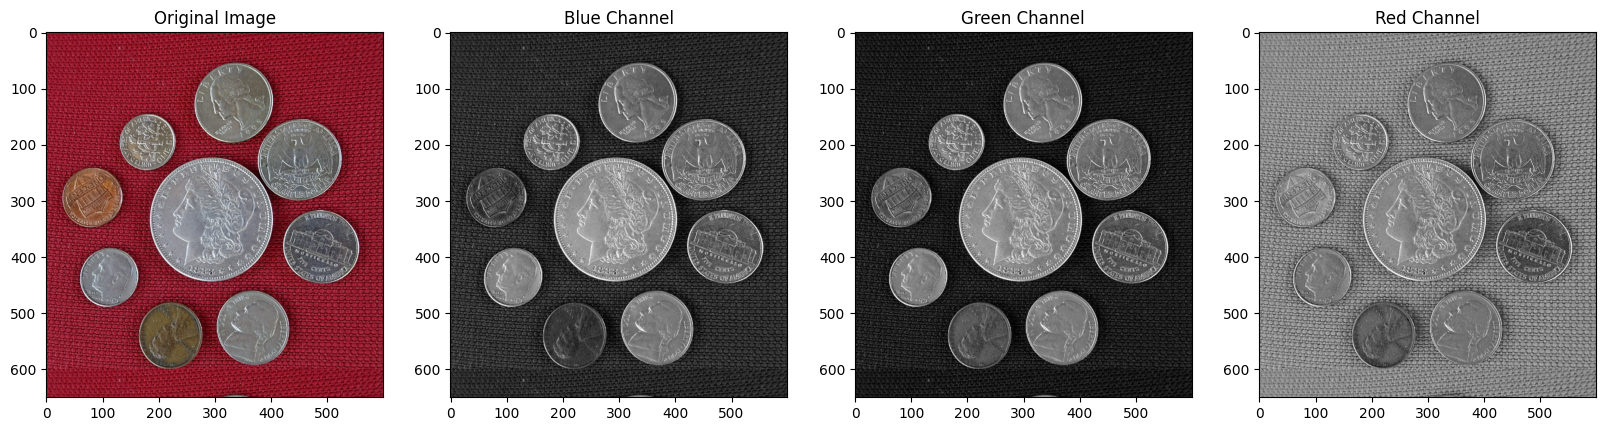

In [29]:
b, g, r = cv2.split(img)

plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(img[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(b,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(g,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.show()
# Expected output

## Perform threshold

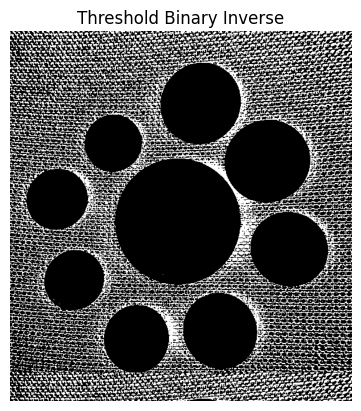

In [37]:
_, bin_inv = cv2.threshold(g, 20, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bin_inv, cmap='gray')
plt.title("Threshold Binary Inverse")
plt.axis('off')
plt.show()

## Peform morphological operation

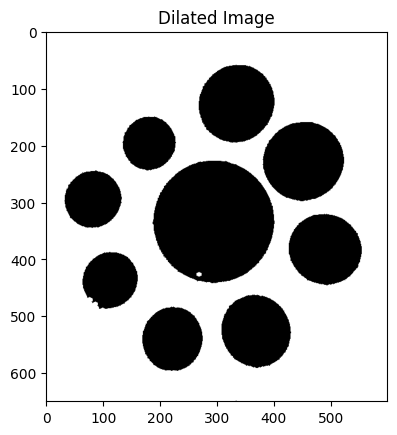

In [42]:
ksize = (5, 5)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
img_dil = cv2.dilate(bin_inv, kernel2, iterations=2)

plt.imshow(img_dil, cmap='gray')
plt.title('Dilated Image')
plt.show()


#### Erosion

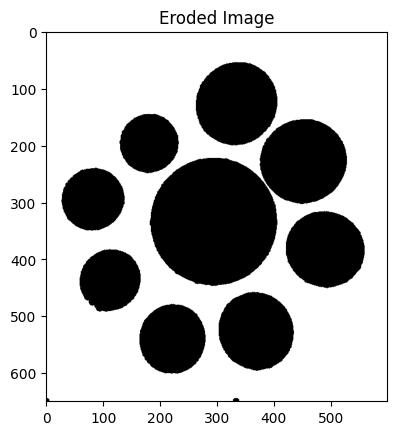

In [47]:
ksize=(11,11)
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
imageEroded = cv2.erode(img_dil, kernel3, iterations=1)
plt.imshow(imageEroded,cmap='gray');plt.title("Eroded Image");plt.show()

## Create SimpleBlobDetector

In [49]:
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

params.filterByArea = False

params.filterByCircularity = True
params.minCircularity = 0.8

params.filterByConvexity = True
params.minConvexity = 0.8

params.filterByInertia =True
params.minInertiaRatio = 0.8

detector = cv2.SimpleBlobDetector_create(params)

## Detect coins

In [50]:
keypoints = detector.detect(imageEroded)
print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 9


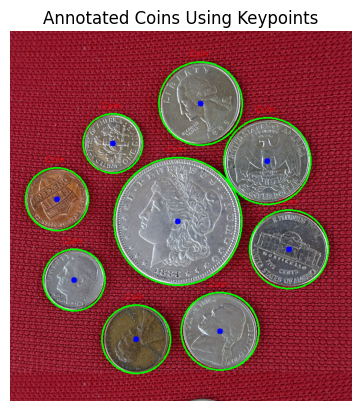

In [54]:
for k in keypoints:
    x,y=k.pt
    x=int(round(x))
    y=int(round(y))
    cv2.circle(img,(x,y),5,(255,0,0),-1)  # blue
    dia=k.size
    rad=int(round(dia/2))
    cv2.circle(img, (x, y), rad, (0, 255, 0), 2) # green

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Annotated Coins Using Keypoints")
plt.axis('off')
plt.show()